## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns

%matplotlib inline

%config Inlinebackend.figure_format= 'retina'

In [2]:
df = pd.read_csv(r"amz_uk_price_prediction_dataset.csv")

df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [3]:
cat = df.select_dtypes(exclude="number")
cat.info()
display(cat.describe().T)
cat.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   asin          object
 1   title         object
 2   isBestSeller  bool  
 3   category      object
dtypes: bool(1), object(3)
memory usage: 58.3+ MB


,count,unique,top,freq
asin,2443651,2222742,B07MVP6T9C,7
title,2443651,2077591,OYhmc Portable Pedal Exerc,723
isBestSeller,2443651,2,False,2435671
category,2443651,296,Sports & Outdoors,836265


Index(['asin', 'title', 'isBestSeller', 'category'], dtype='object')

In [4]:
cat.category.value_counts().head(5)

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

the top 5 categories listed are Sports & Outdoors, Beauty, Handmade Clothing, Shoes & Accessories, Bath & Body, and Birthday Gifts 

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Name: count, dtype: int64

C:\Users\traik\AppData\Local\Temp\ipykernel_9140\3047955774.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cats.index, y=top_cats.values, palette = "magma")


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(3, 0, 'Bath & Body'),
  Text(4, 0, 'Birthday Gifts'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Skin Care'),
  Text(7, 0, 'Make-up')])

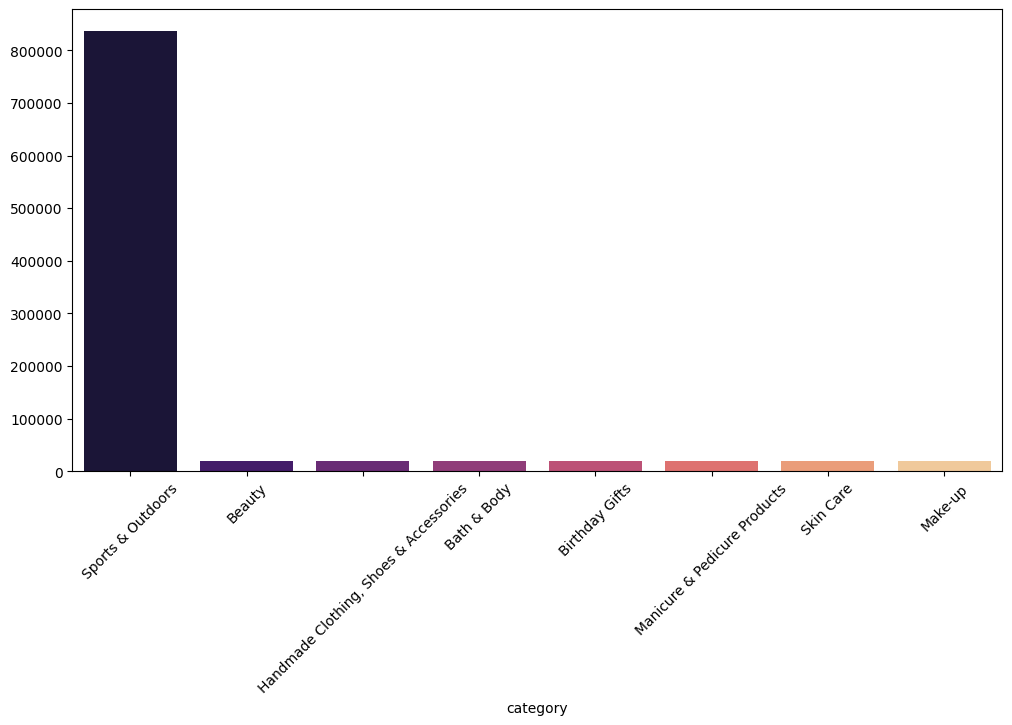

In [5]:
#cat = cat.reset_index()
top_cats = cat['category'].value_counts().head(8)
display(top_cats)
#sns.countplot(data=cat, x=top_cats, palette = "magma")

plt.figure(figsize=(12,6))
sns.barplot(x=top_cats.index, y=top_cats.values, palette = "magma")
plt.xticks(rotation = 45)

<Axes: ylabel='count'>

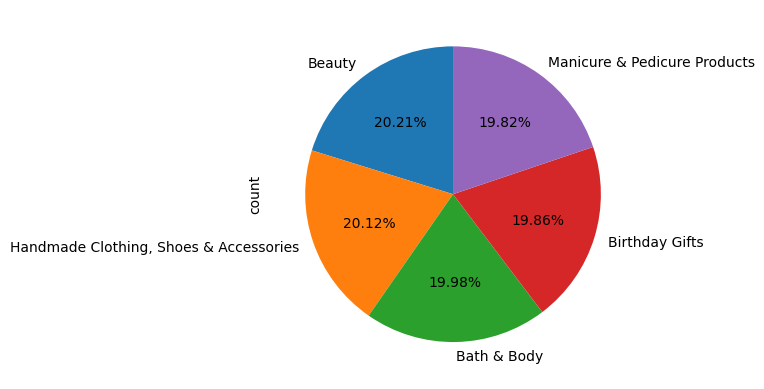

In [6]:
top_cats_subset = top_cats.iloc[1:6]
top_cats_subset.plot.pie(autopct ='%1.2f%%', startangle = 90, )

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 



In [7]:
prices_mean = round(df["price"].mean(),2)
prices_median = round(df["price"].median(),2)
price_mode = round(df["price"].mode(),2)
print(type(prices_mean))
print(prices_mean)
print(f"""
mean of prices = {prices_mean},
prices_median = {prices_median},
mode prices = {price_mode}""")

<class 'numpy.float64'>
89.24

mean of prices = 89.24,
prices_median = 19.09,
mode prices = 0    9.99
Name: price, dtype: float64


The mean of prices is way higher than the mode of all prices. Almost nine times higher!

In [8]:
sd_prices = round(df["price"].std(),2)
iqr_prices = round(df["price"].quantile(0.75)-df["price"].quantile(0.25),2)
range_prices = round(df["price"].max()-df["price"].min(),2)
print(f"""
standard deviation of prices = {sd_prices},
range of prices = {range_prices},
interquantile of prices = {iqr_prices}""")


standard deviation of prices = 345.61,
range of prices = 100000.0,
interquantile of prices = 36.0


the prices are pretty spread as shown by the very big range, although that includes outliers. However, standard deviation is also pretty significant
as is the iqr of the prices

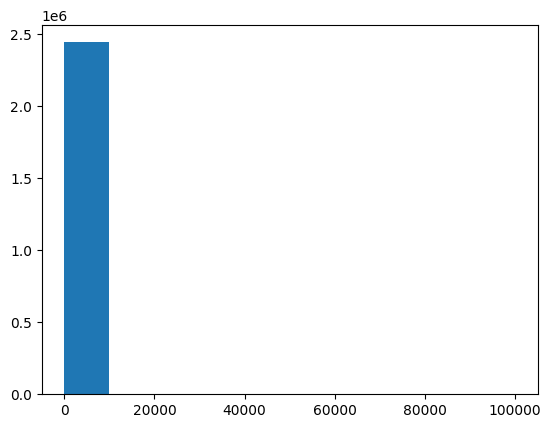

In [9]:
plt.hist(df["price"])
plt.show()

most prices fall in the range 0 and 1000. we cant visually see the outliers that even reach the 10000 price since in comparison to the 
number of products falling in the 0 to 1000 range almost negligable. To solve it we may have to scale y-axis and x-axis.

<function matplotlib.pyplot.show(close=None, block=None)>

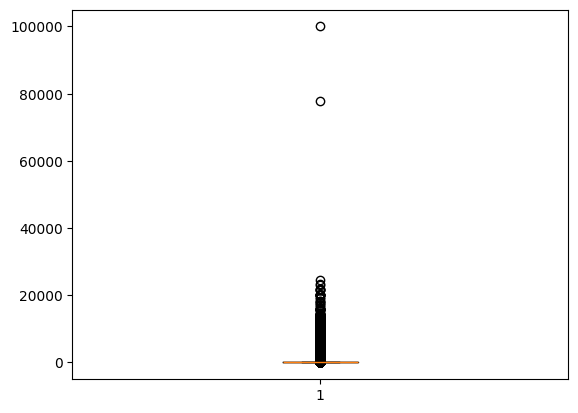

In [10]:
plt.boxplot(df["price"])
plt.show

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

In [14]:
print(df.columns)
ratings = df.query("stars>0")["stars"]
#ratings = df[df["stars"]>0]
#missing_ratings = df["stars"].isnull().sum()
#print(missing_ratings)
display(ratings)
ratings_mean = round(ratings.mean(),2)
ratings_median = round(ratings.median(),2)
ratings_mode = round(ratings.mode().iloc[0],2)

print(f"""
mean of ratings = {ratings_mean},
ratings_median = {ratings_median},
mode ratings = {ratings_mode}""")

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')


0          4.7
1          4.7
2          4.7
3          4.7
4          4.6
          ... 
2443642    3.6
2443643    4.1
2443644    3.6
2443649    4.3
2443650    4.5
Name: stars, Length: 1218010, dtype: float64


mean of ratings = 4.32,
ratings_median = 4.4,
mode ratings = 4.5


costumers usually rate products very highly as seen by the very high mean median and mode

In [15]:
ratings_std = round(ratings.std(),2)
ratings_iqr = round(ratings.quantile(0.75)-ratings.quantile(0.25),2)
ratings_range = round(ratings.max()-ratings.min(),2)
print(f"""
standard deviation of ratings = {ratings_std},
range of ratings = {ratings_range},
interquantile of ratings = {ratings_iqr}""")


standard deviation of ratings = 0.56,
range of ratings = 4.0,
interquantile of ratings = 0.5


ratings are in big part consistent as proven by the low standard deviation

In [16]:
skewness = round(ratings.skew(),2)
kurtosis = round(ratings.kurtosis(),2)  
print(f"""
skewness of ratings = {skewness},
kurtosis of ratings = {kurtosis}""")


skewness of ratings = -2.38,
kurtosis of ratings = 9.78


the data is negatively skewed which means there are relatively few low ratings in comparison to the amount of high ratings.
A high kurtosis as seen above means that most products have similar ratings but some extreme outliers exist.

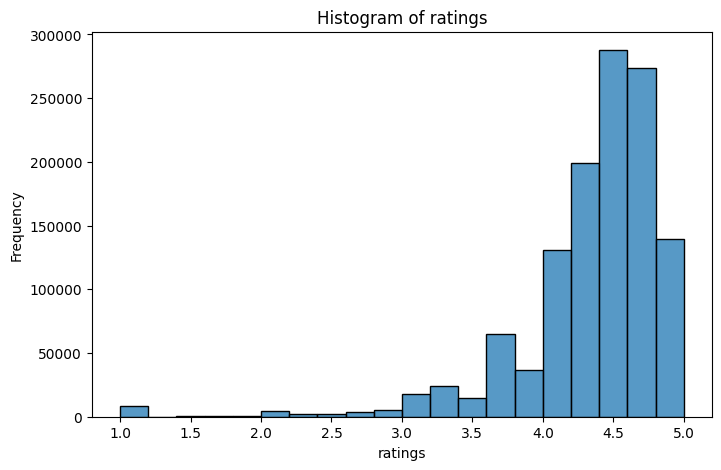

In [22]:
# Histogram
plt.figure(figsize=(8,5))  # Figure width=8, height=5 inches
sns.histplot(ratings, bins=20)  # 20 bins, no KDE curve
plt.title(f'Histogram of ratings')
plt.xlabel("ratings")
plt.ylabel('Frequency')
plt.show()